# Student Performance Data

## General Description of Data

In [14]:
import pandas as pd
sp = pd.read_csv("StudentsPerformance.csv")
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Question 1 - Does parental level of education affect test scores?

For this, I pivoted tables so that I could see how the parents' level of education affected average test scores for different racial groups. 

Then, I noticed that the parental levels of education were all mixed up in terms of how much education a parent received (for instance, high school was in the middle row between bachelor's and master's). So, I replaced the education levels with numbers, and pivoted the tables separately by test type (one table each for math, reading, and writing).

Finally, for each test type I also plotted the data, to see the visual increase/decrease of average test scores.

**Findings:**
1. Group A has the lowest averages in all three test types (math, reading, writing), while Group E has the highest averages.
2. Overall, it appears as if average tests scores for all three test types and all five racial groups increase as parental level of education increases. 
3. The reading and writing test scores have a clearer increase as parental levels of education increase. The math scores seem less correlated with parental education levels. 
4. Group E is definitely above and beyond in terms of average test scores across all parental education levels. 

In [118]:
sp.pivot_table(index="parental level of education",columns="race/ethnicity")

math score                                   \
race/ethnicity                 group A    group B    group C    group D   
parental level of education                                               
associate's degree           61.000000  66.097561  66.730769  67.600000   
bachelor's degree            67.166667  69.300000  68.150000  67.571429   
high school                  60.444444  59.791667  60.906250  62.863636   
master's degree              57.666667  67.166667  67.052632  72.521739   
some college                 63.888889  63.189189  65.130435  68.731343   
some high school             58.916667  61.815789  60.551020  66.760000   

                                       reading score                        \
race/ethnicity                 group E       group A    group B    group C   
parental level of education                                                  
associate's degree           74.897436     67.071429  69.585366  71.128205   
bachelor's degree            76.555556     68.083333  72.950000  75.675000   
high school                  70.772727     62.888889  63.458333  64.421875   
master's degree              74.625000     64.666667  80.166667  70.526316   
some college                 73.828571     65.777778  65.756757  69.420290   
some high school             72.111111     62.083333  66.447368  65.632653   

                                                  writing score             \
race/ethnicity                 group D    group E       group A    group B   
parental level of education                                                  
associate's degree           70.540000  73.820513     63.571429  68.243902   
bachelor's degree            70.142857  74.833333     68.333333  71.650000   
high school                  64.409091  70.318182     60.500000  61.250000   
master's degree              77.173913  82.125000     67.666667  77.166667   
some college                 70.880597  72.628571     65.000000  64.189189   
some high school             69.980000  69.555556     58.583333  64.605263   

                                                              
race/ethnicity                 group C    group D    group E  
parental level of education                                   
associate's degree           70.269231  69.860000  73.205128  
bachelor's degree            75.900000  71.892857  75.388889  
high school                  61.656250  63.159091  67.545455  
master's degree              69.526316  79.739130  80.500000  
some college                 68.869565  71.701493  70.200000  
some high school             63.285714  69.100000  66.555556

Replacing the levels of parental education with this code:

1. some high school
2. high school
3. some college
4. associate's degree
5. bachelor's degree
6. master's degree

In [119]:
new_sp = sp.replace(["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"], [1,2,3,4,5,6])
new_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,5,standard,none,72,72,74
1,female,group C,3,standard,completed,69,90,88
2,female,group B,6,standard,none,90,95,93
3,male,group A,4,free/reduced,none,47,57,44
4,male,group C,3,standard,none,76,78,75


In [120]:
new_sp_math = new_sp.pivot_table(index="parental level of education",columns="race/ethnicity",values="math score")
new_sp_reading = new_sp.pivot_table(index="parental level of education",columns="race/ethnicity",values="reading score")
new_sp_writing = new_sp.pivot_table(index="parental level of education",columns="race/ethnicity",values="writing score")

new_sp_math

race/ethnicity,group A,group B,group C,group D,group E
parental level of education,,,,,
1,58.916667,61.815789,60.551020,66.760000,72.111111
2,60.444444,59.791667,60.906250,62.863636,70.772727
3,63.888889,63.189189,65.130435,68.731343,73.828571
4,61.000000,66.097561,66.730769,67.600000,74.897436
5,67.166667,69.300000,68.150000,67.571429,76.555556
6,57.666667,67.166667,67.052632,72.521739,74.625000


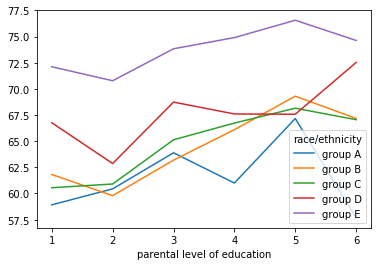

In [121]:
%matplotlib inline
new_sp_math.plot()

In [122]:
new_sp_reading

race/ethnicity,group A,group B,group C,group D,group E
parental level of education,,,,,
1,62.083333,66.447368,65.632653,69.980000,69.555556
2,62.888889,63.458333,64.421875,64.409091,70.318182
3,65.777778,65.756757,69.420290,70.880597,72.628571
4,67.071429,69.585366,71.128205,70.540000,73.820513
5,68.083333,72.950000,75.675000,70.142857,74.833333
6,64.666667,80.166667,70.526316,77.173913,82.125000


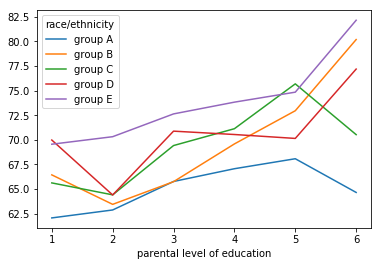

In [123]:
%matplotlib inline
new_sp_reading.plot()

In [124]:
new_sp_writing

race/ethnicity,group A,group B,group C,group D,group E
parental level of education,,,,,
1,58.583333,64.605263,63.285714,69.100000,66.555556
2,60.500000,61.250000,61.656250,63.159091,67.545455
3,65.000000,64.189189,68.869565,71.701493,70.200000
4,63.571429,68.243902,70.269231,69.860000,73.205128
5,68.333333,71.650000,75.900000,71.892857,75.388889
6,67.666667,77.166667,69.526316,79.739130,80.500000


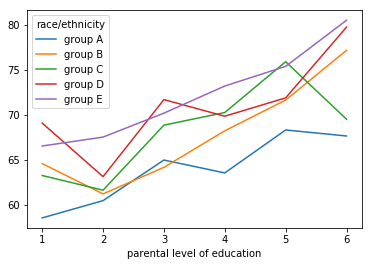

In [125]:
%matplotlib inline
new_sp_writing.plot()

## Question 2 - Do test preparation courses affect test scores?

Similarly to Question 1, I started by pivotting the table and looking at the data a different way. 

However, in addition to looking at mean test scores by racial group, I was also interested in seeing how many students in each racial group did or did not take a test prep course. So, I used **aggfunc='size'** as well to see the student count.

Then, just like with levels of education, I replaced the test preparation values ("completed" or "none") with either a 1 or 0. This would help when visualizing the data.

Finally, I pivoted each table for each individual test type, and plotted the data linearly.

**Findings:**
1. The counts of how many students in each racial group have or haven't taken a test prep course are interesting, but not really meaningful...it would be better to see the percentages of each group. However, no matter how much I wrangled with the data, I couldn't figure out how to get percentages to show. **Help?**
2. Unlike the parental education levels data, the lines for all the test preparation plot graphs are clearly increasing at a steady rate. So, there is likely a strong correlation between taking a test prep course and doing well on tests. 

In [165]:
sp.pivot_table(index='test preparation course',columns='race/ethnicity')

math score                                   \
race/ethnicity             group A    group B    group C    group D   
test preparation course                                               
completed                68.258065  67.191176  67.495726  69.792683   
none                     58.086207  61.368852  62.707921  66.255556   

                                   reading score                        \
race/ethnicity             group E       group A    group B    group C   
test preparation course                                                  
completed                77.433333     71.032258  72.852941  73.658120   
none                     71.112500     61.275862  64.286885  66.465347   

                                              writing score             \
race/ethnicity             group D    group E       group A    group B   
test preparation course                                                  
completed                74.146341  76.666667     70.903226  71.882353   
none                     68.155556  70.300000     58.275862  62.098361   

                                                          
race/ethnicity             group C    group D    group E  
test preparation course                                   
completed                74.452991  76.658537  75.983333  
none                     63.990099  67.177778  67.975000

In [214]:
sp_prep = sp.replace(["completed", "none"], [1,0])

sp_prep.pivot_table(index='test preparation course',columns='race/ethnicity',aggfunc='size')

race/ethnicity,group A,group B,group C,group D,group E
test preparation course,,,,,
0,58,122,202,180,80
1,31,68,117,82,60


In [164]:
sp_prep_math = sp_prep.pivot_table(index='test preparation course',columns='race/ethnicity',values='math score')
sp_prep_reading = sp_prep.pivot_table(index='test preparation course',columns='race/ethnicity',values='reading score')
sp_prep_writing = sp_prep.pivot_table(index='test preparation course',columns='race/ethnicity',values='writing score')

sp_prep_math

race/ethnicity,group A,group B,group C,group D,group E
test preparation course,,,,,
0,58.086207,61.368852,62.707921,66.255556,71.112500
1,68.258065,67.191176,67.495726,69.792683,77.433333


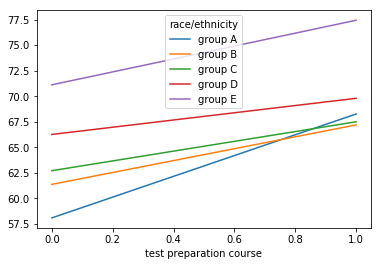

In [168]:
%matplotlib inline
sp_prep_math.plot()

In [166]:
sp_prep_reading

race/ethnicity,group A,group B,group C,group D,group E
test preparation course,,,,,
0,61.275862,64.286885,66.465347,68.155556,70.300000
1,71.032258,72.852941,73.658120,74.146341,76.666667


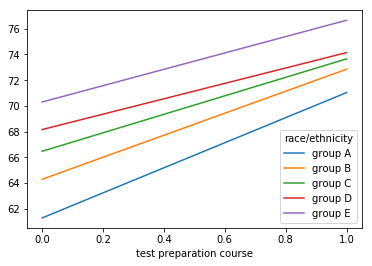

In [169]:
%matplotlib inline
sp_prep_reading.plot()

In [167]:
sp_prep_writing

race/ethnicity,group A,group B,group C,group D,group E
test preparation course,,,,,
0,58.275862,62.098361,63.990099,67.177778,67.975000
1,70.903226,71.882353,74.452991,76.658537,75.983333


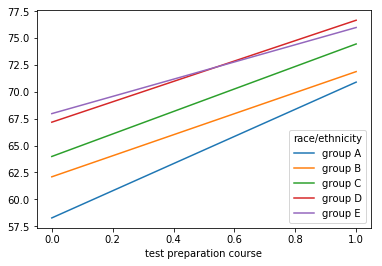

In [170]:
%matplotlib inline
sp_prep_writing.plot()